In [1]:
import numpy as np
import keras
import pickle
from keras.utils.io_utils import HDF5Matrix
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
import itertools
from functions import plot_metrics, plot_images, class_weights_from_labels, f1, plot_f1
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_path = '/Users/diegoeduardo/Desktop/Image Gravity Project/Coral Reef Data desk/models/mlb_classifier_reduced.h5' #where model is stored
model = load_model(model_path, custom_objects={'f1': f1})

In [3]:
batch_size = 32
datapath = '/Users/diegoeduardo/Desktop/Image Gravity Project/Coral Reef Data desk/dataset/mlb_data_reduced.hdf5'
test_img = HDF5Matrix(datapath, 'test_img')
test_labels = HDF5Matrix(datapath, 'test_labels')
test_batches = ImageDataGenerator(rescale=1./255).flow(test_img, test_labels, batch_size=batch_size, shuffle=True)

In [4]:
num_batches = 10
num_classes = test_labels.shape[1]
test_labels_ = np.empty((batch_size*num_batches, num_classes))
for i in range(num_batches):
    __, temp = next(test_batches)
    test_labels_[i*batch_size:(i+1)*batch_size] = temp
predictions = model.predict_generator(test_batches, steps=num_batches, verbose=0)

In [5]:
predictions.shape

(320, 27)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


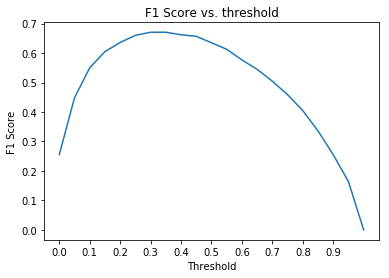

In [6]:
thresholds, f1_scores = plot_f1(test_labels_, predictions, average='micro')

In [7]:
max_f1 = max(f1_scores)
print('Optimal threshold:', thresholds[f1_scores.index(max_f1)])
print('Maximum F1 score:', max_f1)

Optimal threshold: 0.35000000000000003
Maximum F1 score: 0.6706634692246204
